# Proyecto 1

In [2]:
#importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Cargar y familiarizarnos con los datos
### Obtención de datos: 
Recolecta los datos que deseas analizar. Para la regresión lineal simple, necesitarás al menos dos variables: una variable independiente (X) y una variable dependiente (Y).Obtención de datos: Recolecta los datos que deseas analizar. Para la regresión lineal simple, necesitarás al menos dos variables: una variable independiente (X) y una variable dependiente (Y).

In [3]:
#cargar el archivo proyecto_training_data.npy
#data cuando necesite trabajarlo en numpy
numpy_data = np.load('proyecto_training_data.npy')

In [4]:
#Cargarlo con pandas para trabajarlo como DataFrame
df = pd.DataFrame(numpy_data)

#Debemos familiarizarnos con los datos, asi que desplegaremos el DataFrame (5 rows)
df.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
       
1stFlrSF: First Floor square feet
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
YearBuilt: Original construction date
LotFrontage: Linear feet of street connected to property


In [6]:
#Se observa que la columnas(variables no tienen identificador contextual)
#Hay que colocarlos según indicación
df.columns=['SalePrice', 'OverallQual', '1stFLrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df.head()

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## Exploración de datos: 
Realiza un análisis exploratorio de datos para comprender la relación entre las variables. Esto puede incluir gráficos de dispersión y cálculos de correlación.

In [7]:
#Generar estadisticos sumarizados para intenetar comprender la distribución de los datos
df.describe()
#LotFrontage presenta valores faltantes (count)

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [8]:
df.info()
# LotFrontage tiene valores nulos 1201 non-null (259 null)
# *****************************ANOTACION: preguntar que hacer con ellos********************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFLrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [9]:
#Se debe imputar la media en los valores null de la columna
media_columna = df['LotFrontage'].mean()
df['LotFrontage'] = df['LotFrontage'].fillna(media_columna)

In [10]:
#df ahora no tiene valores null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFLrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


## División de datos: 
Separa tus datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utilizará para entrenar el modelo, mientras que el conjunto de prueba se utilizará para evaluar su rendimiento.

In [11]:
# Dividir el conjunto de datos en 80% para entrenamiento y 20% para prueba

numpy_data_not_null = df.values #Convertir el DataFrame a un Numpy array

filas, columnas = numpy_data_not_null.shape #obtener las filas y las columnas
print("filas: ",filas," columnas: ",columnas)

indice_division = int(filas * 0.8) # debemos calcular el índice para dividir los datos 80% y 20%

#Dividiremos los sets 80% y 20% utilizando slicing según lo indicado
train_set = numpy_data_not_null[ :indice_division, : ]
test_set = numpy_data_not_null[indice_division:, :]

filas:  1460  columnas:  6


In [12]:
train_set.shape # Voy a dejar train_set y  test_set como numpy arrays, podemos observar que se ha dividio en el 80%

(1168, 6)

In [13]:
test_set.shape # Se ha separado el 20% del set original

(292, 6)

### train_set y test_set estan en numpy

### train_df y test_df estan en Pandas

In [14]:
train_df = pd.DataFrame(train_set) # quiero trabajar con DataFrame
test_df  = pd.DataFrame(test_set)

In [15]:
#Debo colocar de nuevo los headers a las columnas del train_df
train_df.columns=['SalePrice', 'OverallQual', '1stFLrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
train_df

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.000000
1,181500.0,6.0,1262.0,6.0,1976.0,80.000000
2,223500.0,7.0,920.0,6.0,2001.0,68.000000
3,140000.0,7.0,961.0,7.0,1915.0,60.000000
4,250000.0,8.0,1145.0,9.0,2000.0,84.000000
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.000000
1164,194000.0,5.0,1432.0,5.0,1978.0,70.049958
1165,233170.0,7.0,1502.0,7.0,2009.0,79.000000
1166,245350.0,8.0,1694.0,7.0,2008.0,64.000000


In [16]:
#Debo colocar de nuevo los headers a las columnas del test_df
test_df.columns=['SalePrice', 'OverallQual', '1stFLrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
test_df

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
287,175000.0,6.0,953.0,7.0,1999.0,62.0
288,210000.0,6.0,2073.0,7.0,1978.0,85.0
289,266500.0,7.0,1188.0,9.0,1941.0,66.0
290,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [17]:
#Quiero dejar los estadisticos en variables que pudieran ser útiles después
media_train_df  = train_df.mean()
maximo_train_df = train_df.max()
minimo_train_df = train_df.min()
rango_train_df  = maximo_train_df - minimo_train_df
std_train_df    = train_df.std()

In [18]:
#Quiero dejar los estadisticos en variables que pudieran ser útiles después
media_test_df  = test_df.mean()
maximo_test_df = test_df.max()
minimo_test_df = test_df.min()
rango_test_df  = maximo_test_df - minimo_train_df
std_test_df    = test_df.std()

## Realizar histogramas

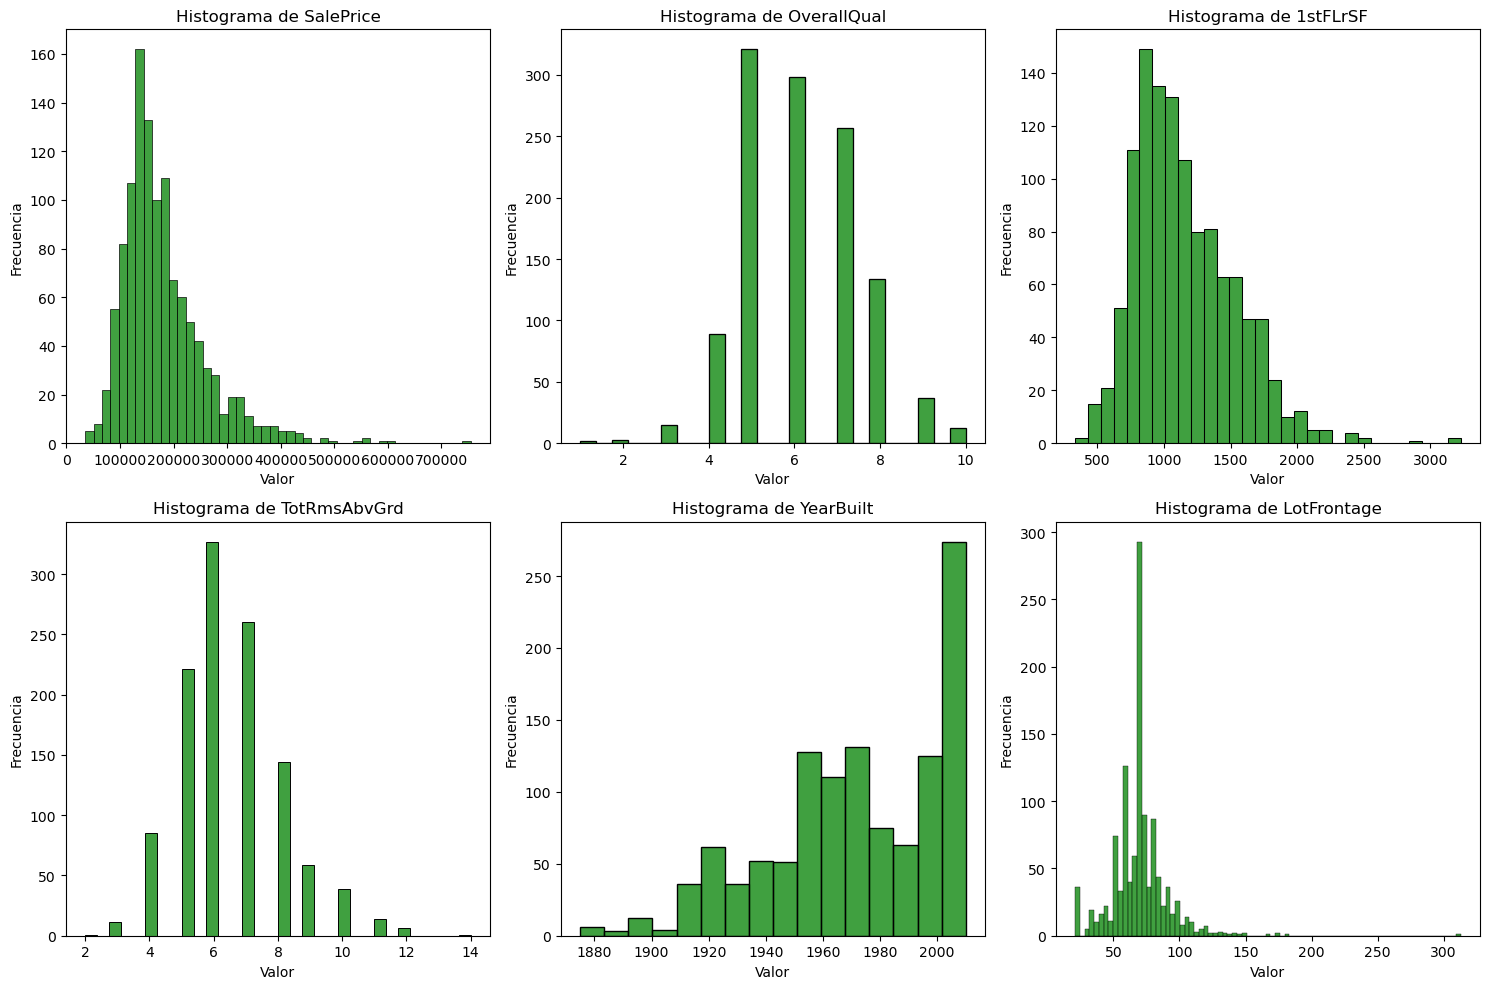

In [19]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada columna del dataframe
for i, column in enumerate(train_df.columns):
    # Crear un subplot para cada variable
    plt.subplot(2, 3, i+1)
    sns.histplot(train_df[column], color = 'green', kde=False)
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

## Calcular lo coeficientes de correlación

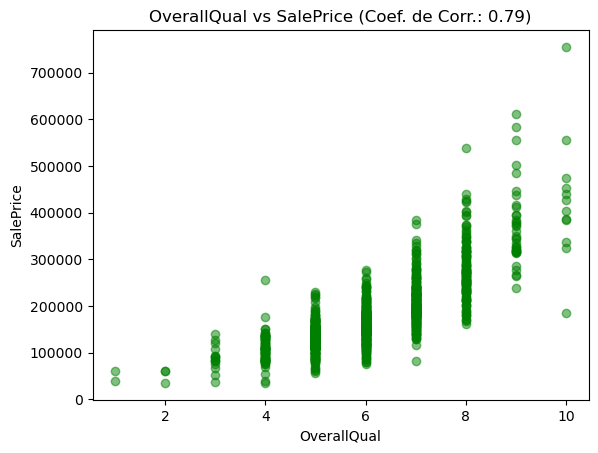

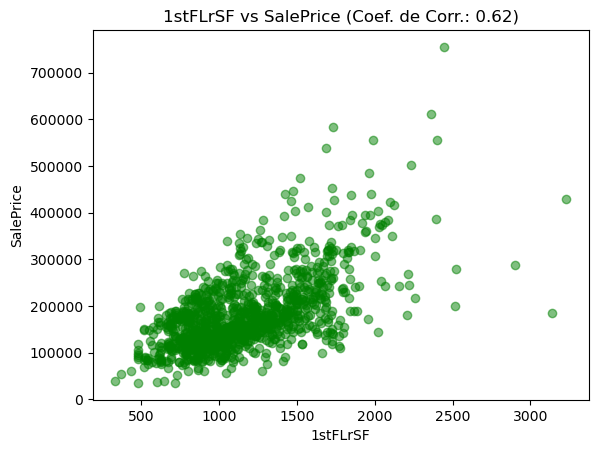

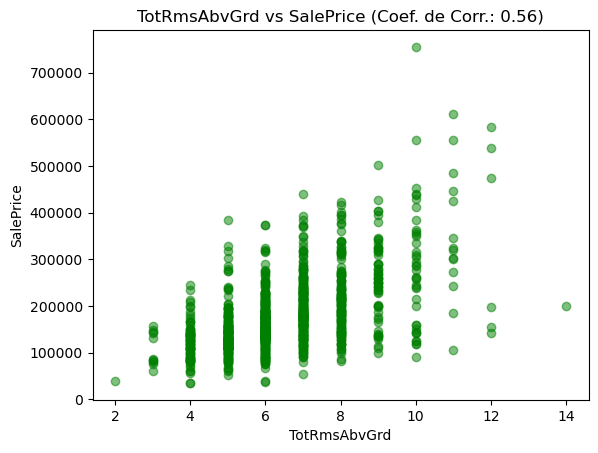

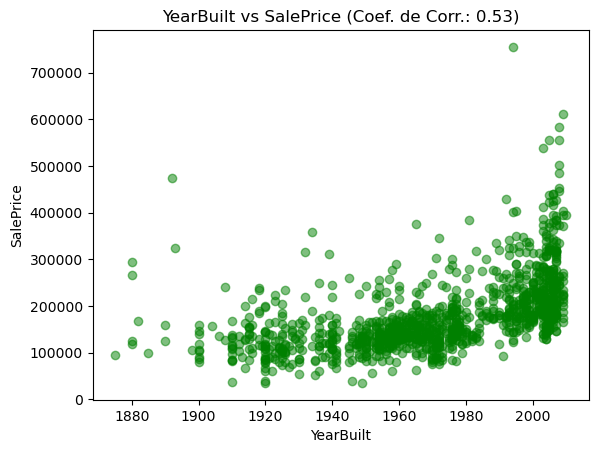

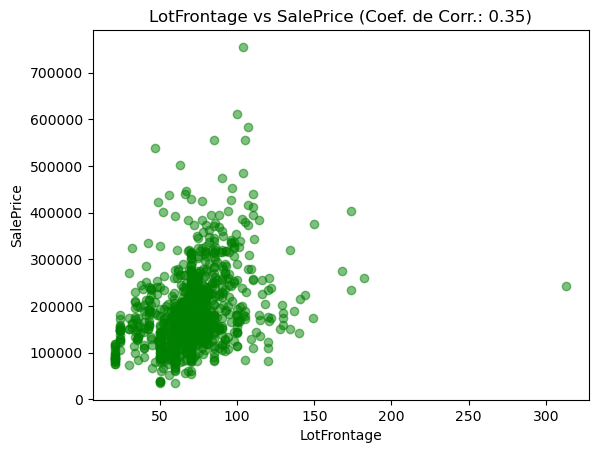

In [20]:
def calcular_correlacion_y_graficar(x, y, nombre_variable):
    # Calcular el coeficiente de correlación
    coef_corr = np.corrcoef(x, y)[0, 1]
    
    # Graficar x vs y
    plt.scatter(x, y, color = 'green', alpha=.5)
    plt.title(f'{nombre_variable} vs SalePrice (Coef. de Corr.: {coef_corr:.2f})', color = 'black')
    plt.xlabel(nombre_variable)
    plt.ylabel('SalePrice')
    plt.show()

# Iterar sobre cada variable independiente
for column in train_df.columns:
    if column != 'SalePrice':
        # Obtener la variable independiente x
        x = train_df[column]
        
        # Calcular el coeficiente de correlación y graficar x vs y
        calcular_correlacion_y_graficar(x, train_df['SalePrice'], column)

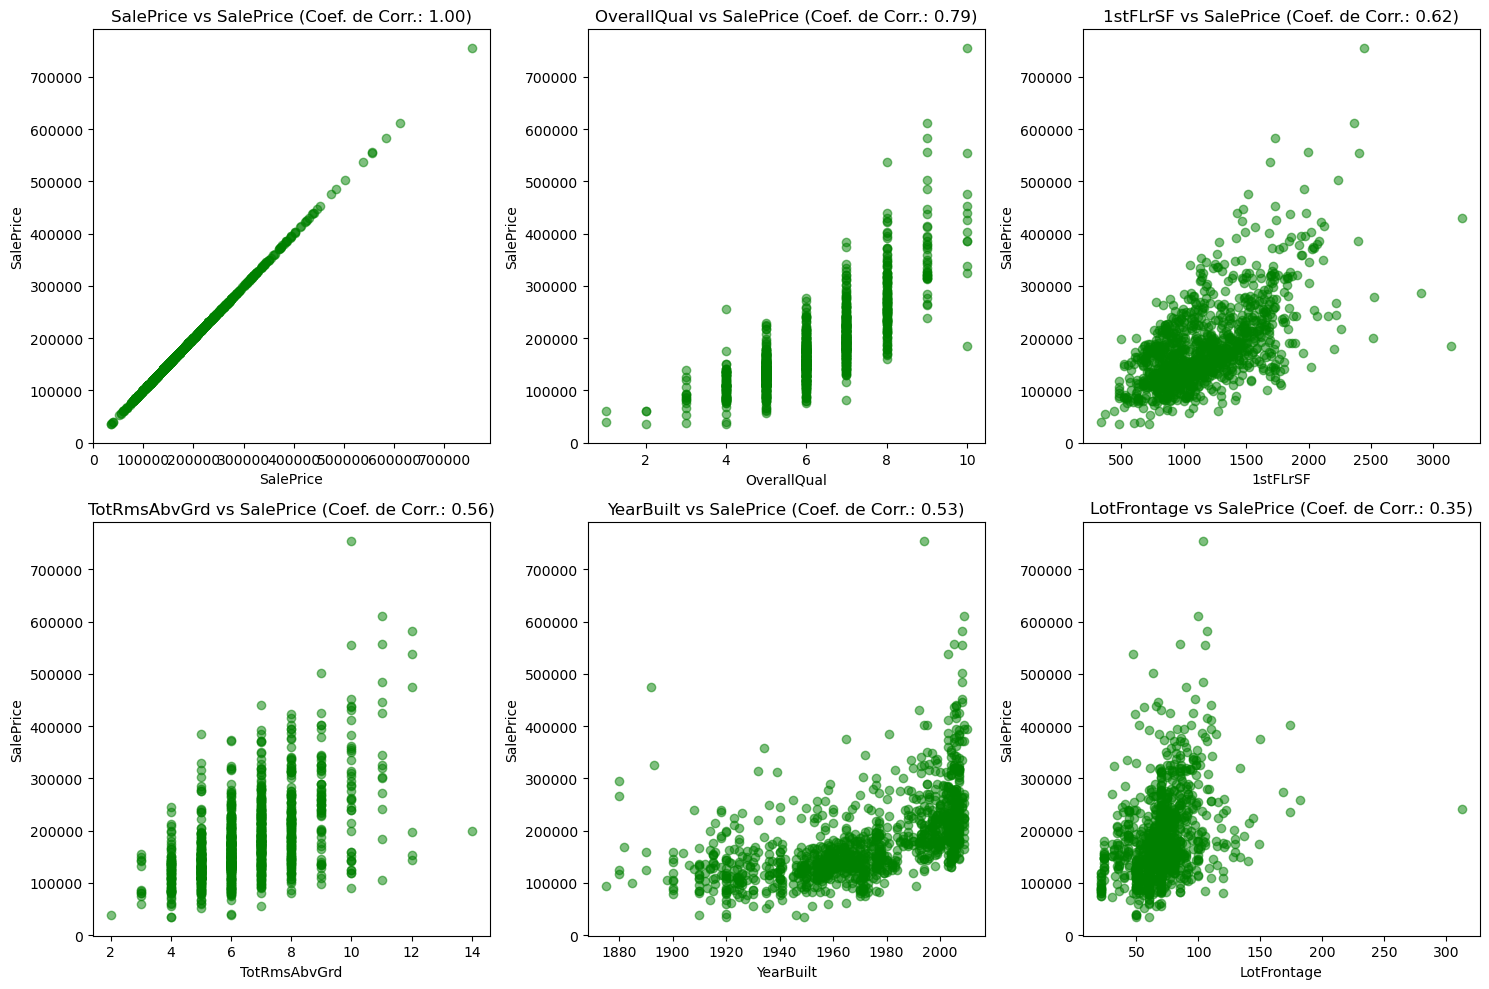

In [21]:
# Quiero observar las gráficas en la misma figura

def calcular_correlacion(x, y):
    # Calcular el coeficiente de correlación
    return np.corrcoef(x, y)[0, 1]

# Almacenar los coeficientes de correlación y las gráficas en listas
coeficientes_correlacion = []
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas para 6 gráficas
axs = axs.flatten()  # Aplanar el arreglo para facilitar el acceso

# Iterar sobre cada variable independiente
for i, column in enumerate(train_df.columns):
    #if column != 'SalePrice': # No se si es necesario graficar la correlación con ella misma,pero si no se pone se ve mal
    # Obtener la variable independiente x
    x = train_df[column]

    # Calcular el coeficiente de correlación y almacenar
    coef_corr = calcular_correlacion(x, train_df['SalePrice'])
    coeficientes_correlacion.append(coef_corr)

    # Graficar x vs y en la posición i
    axs[i].scatter(x, train_df['SalePrice'], color ='green', alpha=.5)
    axs[i].set_title(f'{column} vs SalePrice (Coef. de Corr.: {coef_corr:.2f})')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()




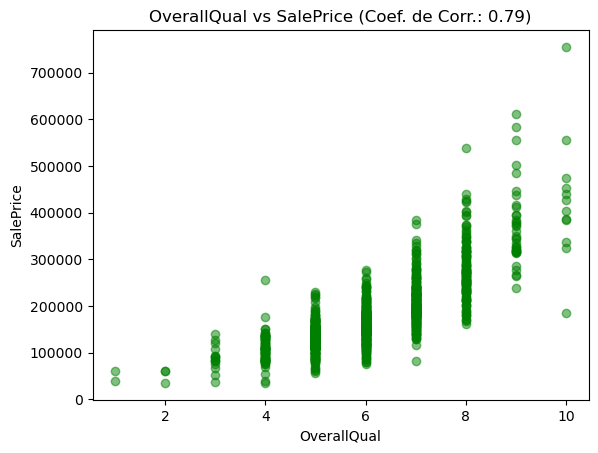

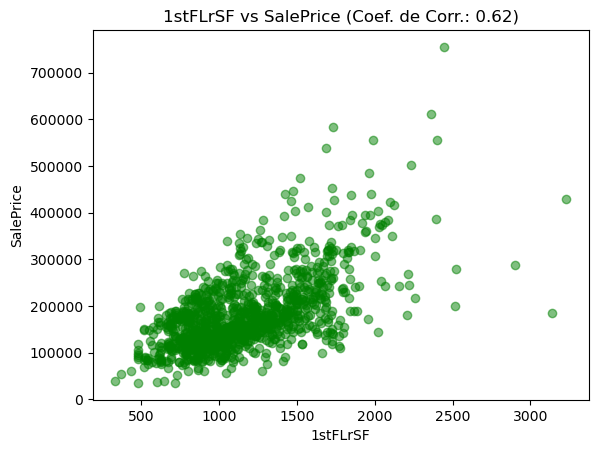

Las variables candidatas para correlacionarlas con SalePrice son OverallQual y 1stFLrSF


In [22]:
# Calcular los coeficientes de correlación entre todas las variables independientes y SalePrice
#Aunque las correlaciones ya han sido calculadas quiero hacerlo de otra forma
correlaciones = train_df.drop('SalePrice', axis=1).apply(lambda x: x.corr(train_df['SalePrice']))

# Seleccionar las dos variables con la correlación más grande
variables_seleccionadas = correlaciones.abs().nlargest(2).index

# Graficar las dos variables seleccionadas
for variable in variables_seleccionadas:
    x = train_df[variable]
    calcular_correlacion_y_graficar(x, train_df['SalePrice'], variable)
    
# Imprimir las variables seleccionadas
print(f"Las variables candidatas para correlacionarlas con SalePrice son {variables_seleccionadas[0]} y {variables_seleccionadas[1]}")


## <span style="color:blue"> Las variables candidatas para correlacionarlas con SalePrice son OverallQual y 1stFLrSF</span>


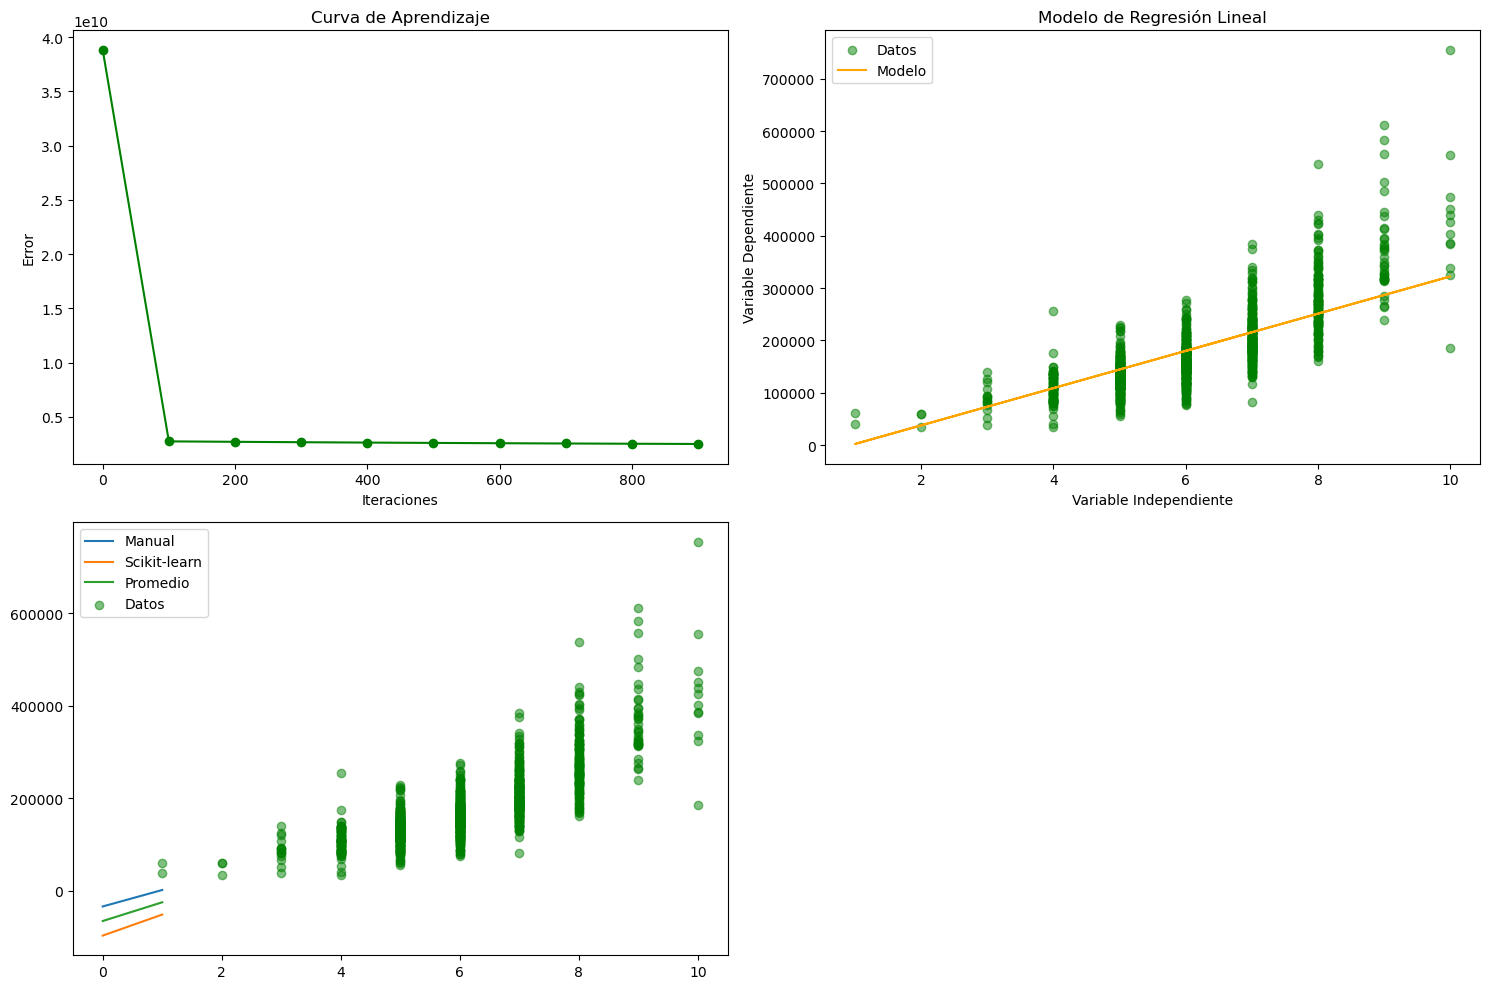

In [23]:
class ModeloRegresionLineal:
    """
    __init__(self, x, y): El constructor de la clase que recibe dos argumentos, x e y, 
    que representan los datos de entrada y salida respectivamente. También inicializa 
    algunos atributos como el número de épocas (epochs), la frecuencia de impresión de 
    errores (imprimir_error_cada), 
    la tasa de aprendizaje (α), una lista para almacenar los errores (errores),
    y un diccionario para almacenar los modelos (modelos).
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.epochs = 1000
        self.imprimir_error_cada = 100
        self.α = 0.01
        self.errores = []
        self.modelos = {}
    
    """
    entrenar_modelo(self): Un método que entrena el modelo de regresión lineal utilizando el algoritmo de descenso de gradiente. 
    Itera sobre el número de épocas especificado, calcula las predicciones, el error cuadrático medio (MSE),
    y actualiza los coeficientes (β) basándose en el gradiente descendente.
    También guarda los errores en la lista errores y almacena los coeficientes finales en el diccionario modelos.
    """
    
    def entrenar_modelo(self):
        X = np.column_stack((self.x, np.ones_like(self.x)))
        β = np.zeros(2)
        
        for epoch in range(self.epochs):
            ŷ = X.dot(β)
            MSE = np.mean((ŷ - self.y)**2)
            gradient = X.T.dot(ŷ - self.y) / len(self.y)
            β -= self.α * gradient
            
            if epoch % self.imprimir_error_cada == 0:
                self.errores.append(MSE)
        
        self.modelos = {'β0': β[1], 'β1': β[0]}
        
    """
    graficar_curva_aprendizaje(self, ax): Un método que grafica la curva de aprendizaje (error vs. épocas) en el eje ax.
    """
    
    def graficar_curva_aprendizaje(self, ax):
        ax.plot(range(0, self.epochs, self.imprimir_error_cada), self.errores, marker='o', color='green')
        ax.set_xlabel('Iteraciones')
        ax.set_ylabel('Error')
        ax.set_title('Curva de Aprendizaje')
        
    """
    graficar_modelo(self, ax): Un método que grafica el modelo de regresión lineal (datos y línea de regresión) en el eje ax.
    """
    
    def graficar_modelo(self, ax):
        ax.scatter(self.x, self.y, label='Datos', color='green', alpha=.5)
        ax.plot(self.x, self.modelos['β0'] + self.modelos['β1']*self.x, color='orange', label='Modelo')
        ax.set_xlabel('Variable Independiente')
        ax.set_ylabel('Variable Dependiente')
        ax.set_title('Modelo de Regresión Lineal')
        ax.legend()
        
    """
    estimar_y(self, x_test): Un método que estima el valor de y para un conjunto de datos x_test, 
    tanto manualmente como utilizando el modelo de Scikit-learn, y devuelve los valores estimados y el promedio de ambos.
    """
    def estimar_y(self, x_test):
        y_manual = self.modelos['β0'] + self.modelos['β1']*x_test
        modelo_sklearn = LinearRegression().fit(self.x.reshape(-1, 1), self.y)
        y_sklearn = modelo_sklearn.predict(x_test.reshape(-1, 1))
        y_promedio = (y_manual + y_sklearn) / 2
        return y_manual, y_sklearn, y_promedio

#Instancia  modelo, entrenamiento  del modelo
x = train_df['OverallQual'].values
y = train_df['SalePrice'].values
modelo = ModeloRegresionLineal(x, y)
modelo.entrenar_modelo()

# Crear una figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Graficar curva de aprendizaje y modelo de regresión lineal en cada eje
modelo.graficar_curva_aprendizaje(axs[0, 0])
modelo.graficar_modelo(axs[0, 1])

# Estimar y para un conjunto de prueba
x_test = np.linspace(0, 1, 20)
y_manual, y_sklearn, y_promedio = modelo.estimar_y(x_test)

# Graficar estimaciones en el tercer eje
axs[1, 0].plot(x_test, y_manual, label='Manual')
axs[1, 0].plot(x_test, y_sklearn, label='Scikit-learn')
axs[1, 0].plot(x_test, y_promedio, label='Promedio')
axs[1, 0].scatter(x, y, label='Datos', color='green', alpha=.5)
axs[1, 0].legend()

# Ocultar el último eje vacío
axs[1, 1].axis('off')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [94]:
class RegresionLinealSimple():
    '''
    __init__(self, x, y, epochs=1000, imprimir_error_cada=100, learning_rate=0.001): El constructor de la 
    clase que recibe tres argumentos obligatorios x e y que representan los datos de entrada y salida, 
    respectivamente, y un tercer argumento opcional epochs que indica el número de épocas para el entrenamiento. 
    También inicializa otros atributos como la frecuencia de impresión de errores (imprimir_error_cada),
    la tasa de aprendizaje (learning_rate), y diversos arrays para almacenar los datos y resultados del entrenamiento.
    '''
    
    def __init__(self, x, y, epochs = 1000, imprimir_error_cada=100, learning_rate = 0.001):
        self.imprimir_error_cada = imprimir_error_cada#parámetros de regresión
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.x_original = x
        self.vect_ones = np.ones_like(x).reshape(-1,1)
        self.xr = np.reshape(x,(-1,1)) #Vectorización de X, Y
        self.xr = np.hstack([self.xr,self.vect_ones])
        self.yr = np.reshape(y, (-1,1))
        self.b0 = np.random.default_rng().normal(np.average(self.x_original), np.std(self.x_original)) #Inicializando betas aleatoria
        self.b1 = np.random.default_rng().normal(np.average(self.yr), np.std(self.yr))
        self.betas = np.array([[self.b1],[self.b0]])
        self.errors = [] # Inicialización de almacenanmiento de errores y modelo
        self.models = {}
        
        """
        entrena el modelo de regresión lineal utilizando el algoritmo de descenso de gradiente.
        Itera sobre el número de épocas especificado, calcula las predicciones, 
        el error cuadrático medio (MSE), y actualiza los coeficientes (betas) basándose en el gradiente descendente. 
        También guarda los errores en una lista y almacena los coeficientes y otros datos relevantes en un diccionario de modelos.
        """
        for i in range(0, self.epochs):
            #Predicciones
            self.y_pred = np.matmul(self.xr, self.betas)
            
            #Calculo del error
            self.e = 1/(2*self.yr.shape[0]) * np.sum((self.yr - self.y_pred)**2)
            self.errors.append(self.e)
            
            #Creando una estructura de datos (diccionario) que almacene los betas, 
            #la y predicha, la y real, y el valor de x sin un array de 1s
            self.models[i] = [self.betas, self.y_pred, self.yr, self.x_original]

            #calculando gradientes y actualización de betas
            self.gradient = (1/self.yr.shape[0]) * sum((self.y_pred - self.yr)*self.xr)
            self.mult_gradient = (self.learning_rate*self.gradient)
            self.mult_gradient = self.mult_gradient.reshape((-1,1))
            self.betas = self.betas - self.mult_gradient

            # Mostrando resultados después de cada n iteraciones
            if i%self.imprimir_error_cada==0:
                print('Iteración: ', i)
                print('Error: ',self.e)
                print("")
        
    # modelos_entrenados(self): método que devuelve el diccionario de modelos y un array con los errores.  
    def modelos_entrenados(self): 
        return self.models , np.array(self.errors)
    
    # método que recibe un array x_rp como entrada y devuelve una predicción y basada en el modelo entrenado.
    #def predictions(self, x_rp):
    def predicciones(self, x_rp):
        self.x_rp = x_rp
        self.vect_ones_xp = np.ones_like(self.x_rp).reshape(-1,1)
        self.xp = np.reshape(self.x_rp,(-1,1))
        self.xp = np.hstack([self.xp,self.vect_ones_xp])
        self.yp = np.matmul(self.xp, self.betas)
        return self.yp

    # método estático que calcula los errores entre los valores reales de Y y los valores predichos
    @staticmethod
    def error_predictions(ypp, ypr):
        ep = 1/(2*ypp.shape[0]) * np.sum((ypr - ypp)**2)
        return ep
    
    # método estático que grafica los errores del modelo a lo largo de las épocas.
    @staticmethod
    def error_plot(errors):
        plt.figure(figsize = (7,5))
        plt.plot(errors)
        plt.title("Errores del Modelo", fontsize = 13)
        plt.xlabel("epoch", fontsize = 12)
        plt.ylabel("errores")
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.show()
   
    """  método estático que grafica la evolución del modelo entrenado a lo largo del tiempo (epochs) """
    @staticmethod
    def model_plot(models_t,n):
        fig = plt.figure(figsize = (9,6))
        ax =  fig.add_axes([0.1,0.1,0.7,0.7])
        ax.set_title('Comparativa de modelos')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        i = 0
        for k in models_t.keys():
            if k%n == 0 and k != 0:
                ax.scatter(x = models_t[k][3], y = models_t[k][2], color = 'deepskyblue', alpha = 0.1)
                ax.plot(models_t[k][3],  models_t[k][1], linestyle ='solid', color ='greenyellow')

            if k == max(models_t.keys()):
                ax.plot(models_t[k][3],  models_t[k][1], linestyle ='solid', color ='green')
                ax.text(max(models_t[k][3]),max(models_t[k][1])+100, 'Modelo '+str(k), fontsize='small')
        plt.show()
        
    # método estático que grafica la evolución de los coeficientes beta a lo largo de las épocas
    @staticmethod
    def betas_plot(models):
        b0 = []
        b1 = []
        for k in models.keys():
            b1.append(models[k][0][0])
            b0.append(models[k][0][1])
        fig = plt.figure(figsize = (8,5))
        ax =  fig.add_axes([0.1,0.1,0.7,0.7])
        ax.plot(b0)
        ax.plot(b1)
        ax.legend(['B0','B1'])
        ax.set_title('Evolución de Betas')
        ax.set_ylabel('Betas')
        ax.set_xlabel('Epocs')
        
    # método estático que toma dos modelos entrenados como parámetros y predice
    #los valores de una variable independiente x específica, devolviendo las predicciones de ambos modelos y el promedio de estos.                
    @staticmethod
    def model_comparative(model1, model2 , x):
        #predicciones del modelo propio
        result_m1 = model1.predicciones(x)
        #predicciones de sklearn
        result_m2 = model2.predict(x.reshape(-1,1))        
        #promedio de ambos modelos
        avg_result = (result_m1 + result_m2)/2
        return result_m1, result_m2, avg_result
    
    
    # método estático que recibe una tupla con las predicciones de
    #model_comparative y los valores reales de y, y grafica el error de cada modelo
    @staticmethod
    def ploting_error_models(modelos, y):
        i = 0
        labels = []
        e_modelos = []
        colors = ['red', 'blue', 'green'] #######
        for r in modelos:
            i +=1
            e_modelos.append(RegresionLinealSimple.error_predictions(r, y))
            labels.append('Modelo'+str(i) + '\n'+str(round(RegresionLinealSimple.error_predictions(r, y),0)))
        plt.figure(figsize =(8,5))
        fig, ax = plt.subplots()
        ax.bar(labels, e_modelos, color=colors[:len(e_modelos)])
        fig.tight_layout()
        plt.show()


In [81]:
train_OverallQual = train_df['OverallQual'].values
train_SalePrice = train_df['SalePrice'].values

m1 = RegresionLinealSimple(train_OverallQual, train_SalePrice, 6001,1200,0.01)
m1_modelos, m1_errores = m1.modelos_entrenados()



Iteración:  0
Error:  364644021809.3656

Iteración:  1200
Error:  1191512022.9158328

Iteración:  2400
Error:  1161227299.88132

Iteración:  3600
Error:  1151508737.2962306

Iteración:  4800
Error:  1148389987.9976928

Iteración:  6000
Error:  1147389161.270286



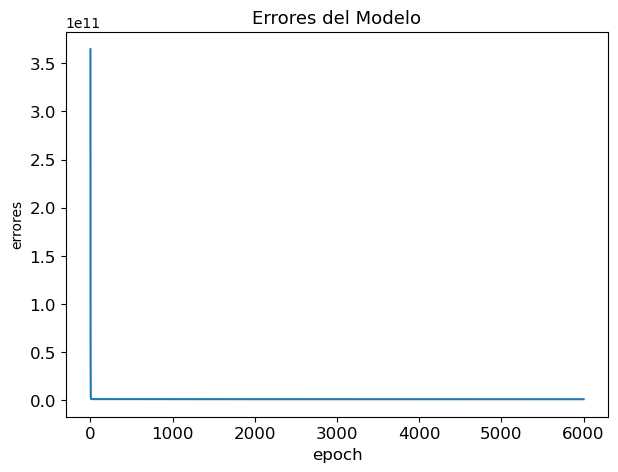

In [82]:
RegresionLinealSimple.error_plot(m1_errores)

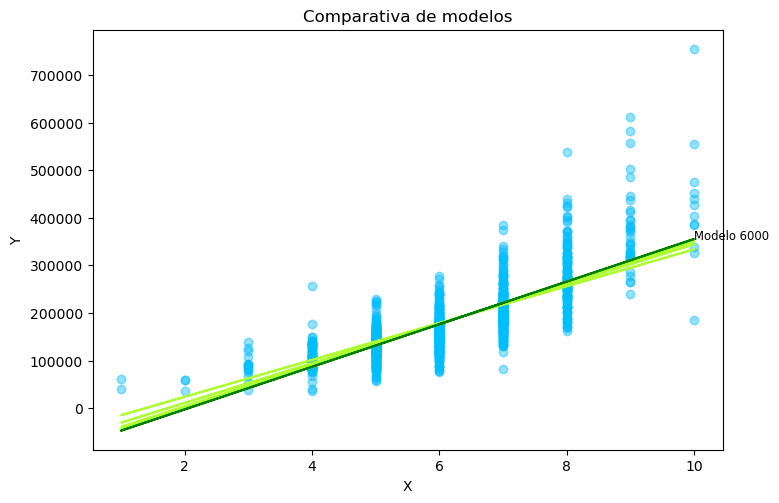

In [83]:
RegresionLinealSimple.model_plot(m1_modelos, 1200)

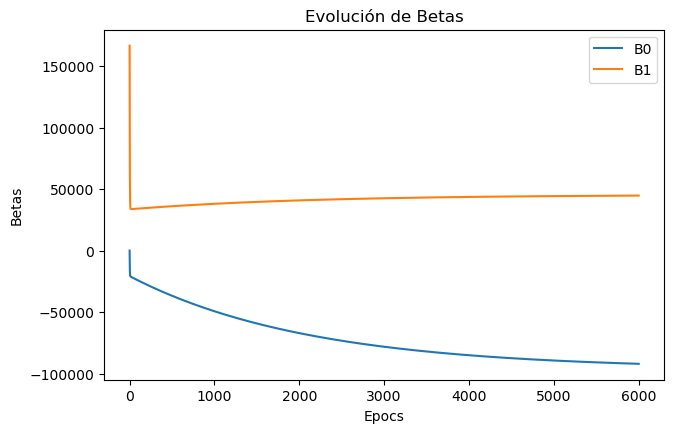

In [84]:
RegresionLinealSimple.betas_plot(m1_modelos)

### Regresión con 1stFLrSF

In [85]:
train_1stFlrSF = train_df['1stFLrSF'].values

m2 = RegresionLinealSimple(train_1stFlrSF, train_SalePrice, 51,10,0.000001)
m2_modelos, m2_errores = m2.modelos_entrenados()  

Iteración:  0
Error:  6.383730847556359e+16

Iteración:  10
Error:  25384424906.87802

Iteración:  20
Error:  1965575918.1803763

Iteración:  30
Error:  1965567249.5244918

Iteración:  40
Error:  1965567172.122275

Iteración:  50
Error:  1965567094.7233567



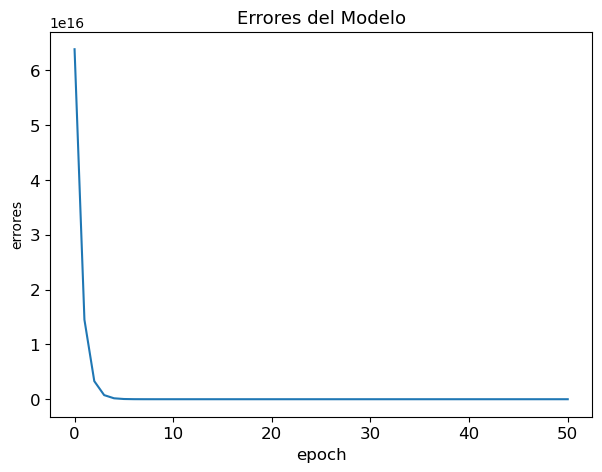

In [86]:
RegresionLinealSimple.error_plot(m2_errores)

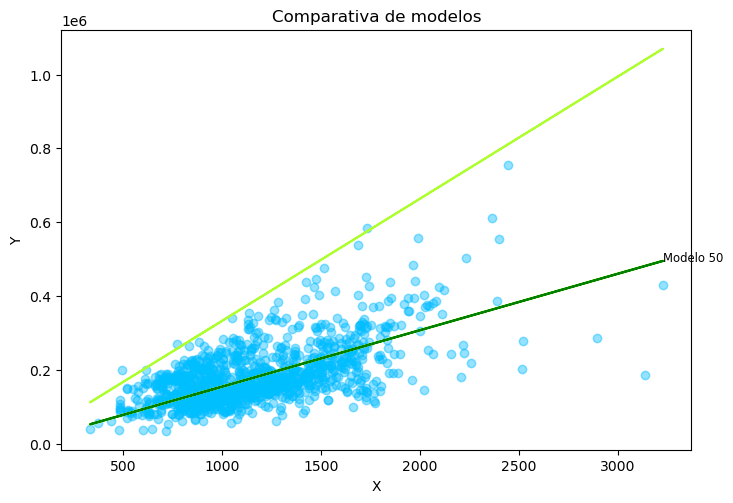

In [87]:
RegresionLinealSimple.model_plot(m2_modelos, 10)

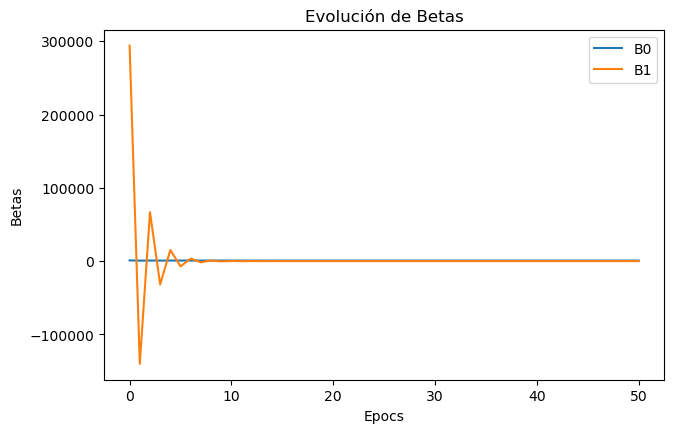

In [88]:
RegresionLinealSimple.betas_plot(m2_modelos)

## Predicciones del modelo vs. sklearn


### Entrenamiento con sklearn

In [89]:
skm1 = LinearRegression().fit(train_OverallQual.reshape(-1,1), train_SalePrice.reshape(-1,1))
skm2 = LinearRegression().fit(train_1stFlrSF.reshape(-1,1), train_SalePrice.reshape(-1,1))

## Predicciones con modelo propio, sklearn y promedio

In [90]:
test_OverallQual = np.array(test_df['OverallQual'])
test_1stFlrSF = np.array(test_df['1stFLrSF'])
test_SalePrice = np.array(test_df['SalePrice'])

In [91]:
modelos_OverallQual = RegresionLinealSimple.model_comparative(m1, skm1, test_OverallQual)
modelos_1stFlrSF = RegresionLinealSimple.model_comparative(m2, skm2, test_1stFlrSF)

<Figure size 800x500 with 0 Axes>

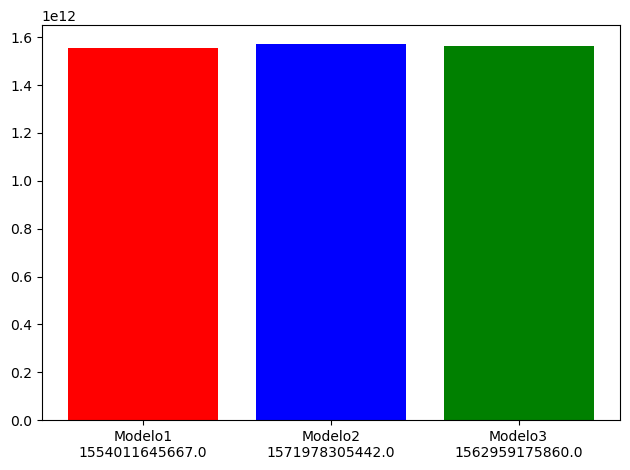

In [92]:
#Compararemos los modelos,  Modelo propio ROJO, Modelo de Sklearn AZUL, Modelo promedio VERDE
RegresionLinealSimple.ploting_error_models(modelos_OverallQual, test_SalePrice)

<Figure size 800x500 with 0 Axes>

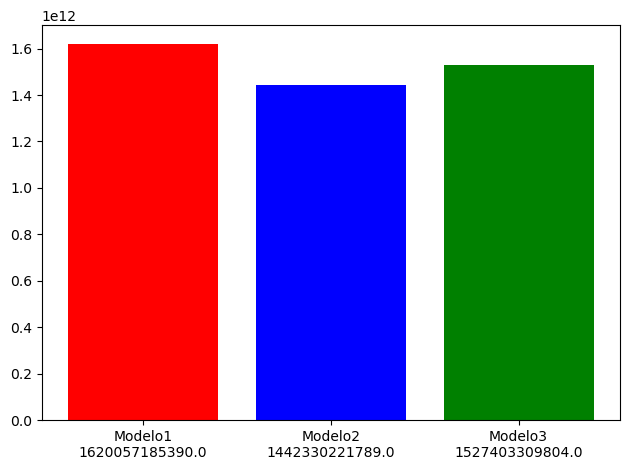

In [93]:
RegresionLinealSimple.ploting_error_models(modelos_1stFlrSF, test_SalePrice)

# Conclusiones
 ## Con el modelo utiizando OverallQual
         Se observa que tienen un error similar,pero nuestro modelo modelo presenta un menor, leve, pero menor error.
         
 ## Con los modelos creados con 1stFlrSF
         Observamos que el modelo de sklearn tiene un error menor, no tan leve, al modelo que se realizó en el proyecto.

# Nota:
 Al imputar la media en la varible LotFrontage se observa un comportamiento no adecuado en el respectivo histigrama.  El anterior análisis esta realizado con las indicaciones dadas.  Por lo que podría ser posible, no fue trabajado, que el coeficiente de correlación con SalePrice fuera mayor.